In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!ls

run_experiments.ipynb	  scaling_experiment.ipynb	    system_info.ipynb
scaling_analysis.ipynb	  scaling.pdf
scaling_data_system2.csv  single_experiment_analysis.ipynb


In [3]:
path = '/home/garg1/logs/pytorch_seed_rl/scaling_experiment_final/a_04_p_2_i_1_n_64_s_02/csv/'
#path = 'pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/'

In [4]:
eps_df = pd.read_csv(path + 'episodes.csv')

In [5]:
eps_df = eps_df.sort_values('episode_id')

In [6]:
# eps_df = eps_df[eps_df['episode_id']< 75000]

In [7]:
eps_df.tail()

,episode_id,return,length,training_steps
598,695.0,0.0,238,80960.0
600,696.0,0.0,238,80960.0
596,697.0,0.0,238,80960.0
599,698.0,0.0,238,80960.0
601,699.0,0.0,238,80960.0


In [8]:
eps_df['count'] = eps_df.groupby(['training_steps'])['episode_id'].agg('count')

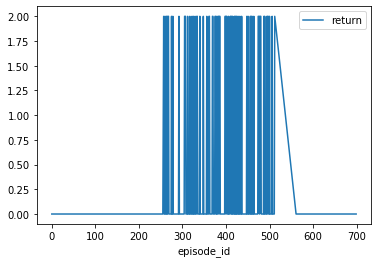

In [9]:
eps_df.plot(x='episode_id', y='return')

eps_df.plot(x='episode_id', y='length')

In [10]:
t_df = pd.read_csv(path + 'training.csv')

In [11]:
# t_df = t_df[t_df['training_steps'] < 5565760]

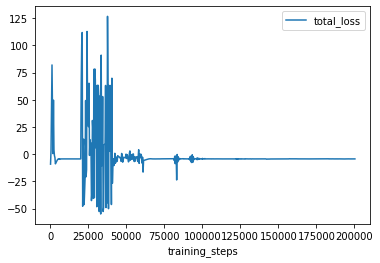

In [12]:
t_df.plot(x='training_steps', y='total_loss')

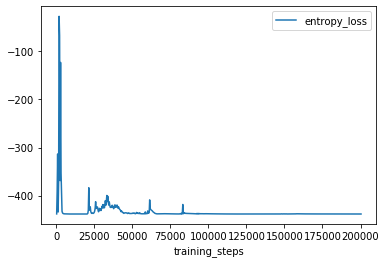

In [13]:
t_df.plot(x='training_steps', y='entropy_loss')

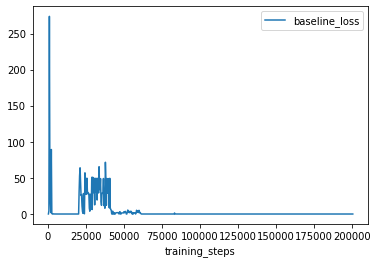

In [14]:
t_df.plot(x='training_steps', y='baseline_loss')

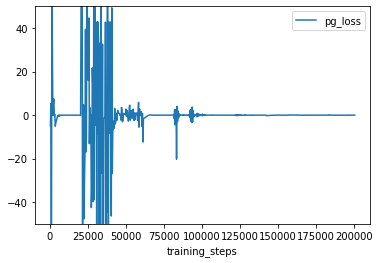

In [15]:
t_df.plot(x='training_steps', y='pg_loss', ylim=[-50, 50])

In [16]:
s_df = pd.read_csv(path + 'system.csv')
# s_df = pd.read_csv('pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/system.csv')

In [17]:
s_df

,runtime,trajectories_seen,episodes_seen,mean_inference_latency,fetching_time,inference_time,inference_steps,training_time,training_steps,queue_batches,queue_drops,queue_rpcs,queue_storing
0,14.217756,0,0,0.000000,0.0,0.432948,5743,0.0,0,0,0,56,1024
1,19.221774,0,0,0.000000,0.0,0.602973,11072,0.0,0,0,0,2,1024
2,24.227042,0,0,0.000000,0.0,0.785493,16320,0.0,0,0,0,9,1024
3,29.229921,58,58,0.211988,0.0,0.989332,21184,0.0,0,0,55,128,1024
4,30.462226,135,134,0.239748,0.0,0.998500,21568,0.0,320,32,0,128,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,228.448904,2514,602,0.205798,0.0,6.611787,206016,0.0,198720,0,0,128,1024
652,228.491966,2519,602,0.205798,0.0,6.611787,206016,0.0,199040,1,0,128,1024
653,228.527839,2522,602,0.205798,0.0,6.611787,206016,0.0,199360,0,0,128,1024
654,228.567295,2527,602,0.205798,0.0,6.611787,206016,0.0,199680,1,0,128,1024


In [18]:
s_df['t_fps'] = s_df['training_steps']/s_df['runtime']
s_df['i_fps'] = s_df['inference_steps']/s_df['runtime']

In [19]:
s_df.iloc[-1]['i_fps'], s_df.iloc[-1]['t_fps']

(901.1927631520703, 874.8764786735692)

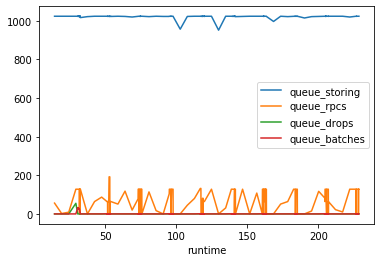

In [24]:
s_df[:1000].plot(x='runtime', y=['queue_storing', 'queue_rpcs', 'queue_drops','queue_batches'])

In [21]:
s_df[['queue_storing','queue_rpcs', 'queue_drops','queue_batches', 'mean_inference_latency']][-1000:].mean()

queue_storing             1023.609756
queue_rpcs                 107.501524
queue_drops                  0.092988
queue_batches                2.414634
mean_inference_latency       0.210081
dtype: float64

In [33]:
s_df = s_df.rename(columns={
    'runtime': 'Runtime [s]',
    'i_fps': 'Inference',
    't_fps': 'Training',
})

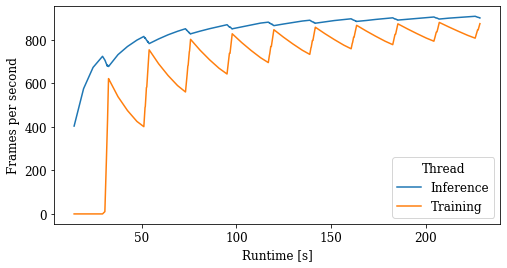

In [60]:
plt.rcParams.update({'font.size': 12,
                     'font.family': "serif"})
s_df.plot(x='Runtime [s]', y=['Inference', 'Training'], figsize=(8,4))
plt.legend(title='Thread')
plt.ylabel('Frames per second')
plt.savefig('threads.pdf')